In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
df=pd.read_csv("iris.csv")

In [121]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,id,label
0,5.1,3.5,1.4,0.2,id_1,Iris-setosa
1,4.9,3.0,1.4,0.2,id_2,Iris-setosa
2,4.7,3.2,1.3,0.2,id_3,Iris-setosa
3,4.6,3.1,1.5,0.2,id_4,Iris-setosa
4,5.0,3.6,1.4,0.2,id_5,Iris-setosa


In [122]:
df['label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [123]:
data_copy = df.copy()
print(data_copy.drop(columns=['id', 'label']).corr())

              Sepal length  Sepal width  Petal length  Petal width
Sepal length      1.000000    -0.109369      0.871754     0.817954
Sepal width      -0.109369     1.000000     -0.420516    -0.356544
Petal length      0.871754    -0.420516      1.000000     0.962757
Petal width       0.817954    -0.356544      0.962757     1.000000


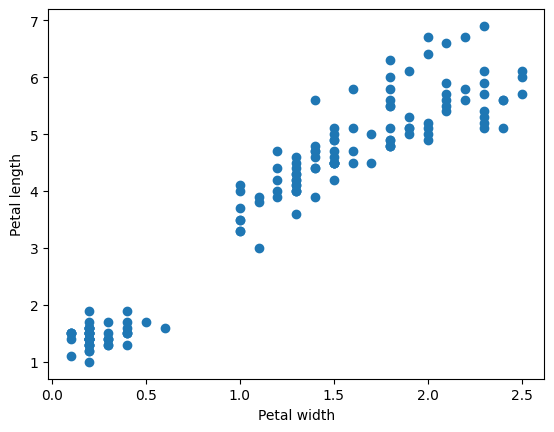

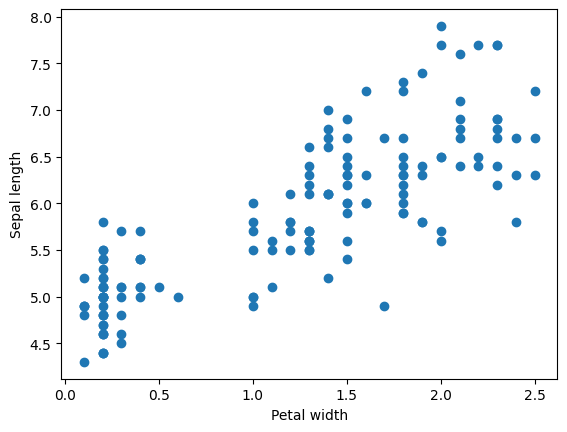

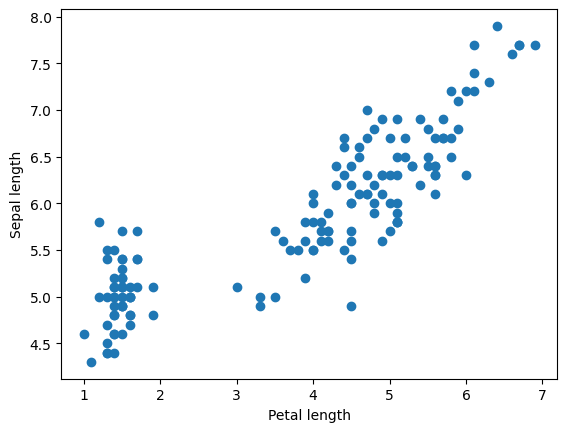

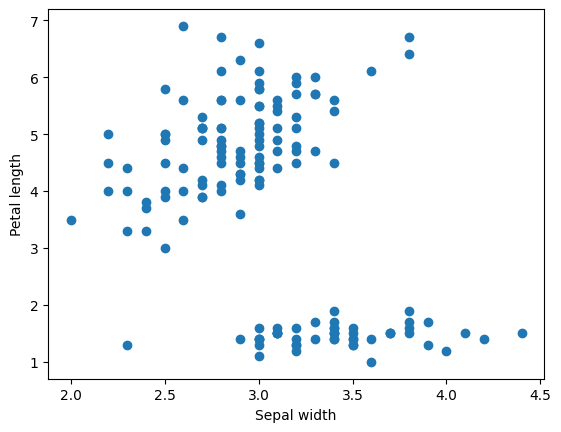

In [124]:
plt.xlabel('Petal width')
plt.ylabel('Petal length')
plt.plot(data_copy['Petal width'], data_copy['Petal length'], 'o')
plt.show()

plt.xlabel('Petal width')
plt.ylabel('Sepal length')
plt.plot(data_copy['Petal width'], data_copy['Sepal length'], 'o')
plt.show()

plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.plot(data_copy['Petal length'], data_copy['Sepal length'], 'o')
plt.show()

# No correlation
plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.plot(data_copy['Sepal width'], data_copy['Petal length'], 'o')
plt.show()


In [125]:
#dropping id and label to make it 4-dimensional points
numeric_columns = data_copy.drop(columns=['id', 'label'])

# Group the DataFrame by 'label' and calculate the mean for each species
species_mean_vector = numeric_columns.groupby(df['label']).mean()
print(species_mean_vector)

                 Sepal length  Sepal width  Petal length  Petal width
label                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


In [126]:
# Group data by label
my_data = numeric_columns.groupby(df['label'])
species_data = dict(list(my_data))
print(species_data)

{'Iris-setosa':     Sepal length  Sepal width  Petal length  Petal width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
5            5.4          3.9           1.7          0.4
6            4.6          3.4           1.4          0.3
7            5.0          3.4           1.5          0.2
8            4.4          2.9           1.4          0.2
9            4.9          3.1           1.5          0.1
10           5.4          3.7           1.5          0.2
11           4.8          3.4           1.6          0.2
12           4.8          3.0           1.4          0.1
13           4.3          3.0           1.1          0.1
14           5.8          4.0           1.2          0.2
15           5.7          4.4           1.5          0.4
16           5.

In [127]:
from scipy.spatial.distance import euclidean
from itertools import combinations
# Initialize an empty DataFrame to store the pairwise distances
euclidean_distance = pd.DataFrame(index=species_mean_vector.index, columns=species_mean_vector.index)

# Compute pairwise Euclidean distances between mean vectors
for pair in combinations(species_mean_vector.index, 2):
    dist = euclidean(species_mean_vector.loc[pair[0]], species_mean_vector.loc[pair[1]])
    euclidean_distance.loc[pair[0], pair[1]] = dist
    euclidean_distance.loc[pair[1], pair[0]] = dist

# Fill diagonal with zeros
for i in range(len(euclidean_distance)):
  euclidean_distance.values[i][i] = 0

print("Euclidean distances between all pairs of species mean vectors:")
print(euclidean_distance)

Euclidean distances between all pairs of species mean vectors:
label           Iris-setosa Iris-versicolor Iris-virginica
label                                                     
Iris-setosa               0        3.205175       4.752592
Iris-versicolor    3.205175               0       1.620489
Iris-virginica     4.752592        1.620489              0


In [128]:
#standardize each of the column vectors
standardized_data = {}
for species, data in species_data.items():
    mean = data.mean()
    std_dev = data.std()
    standardized_data[species] = (data - mean) / std_dev

#calculating mean of standardized columns
standardized_mean_vectors = {}
for species, data in standardized_data.items():
    mean_vector = data.mean().values
    standardized_mean_vectors[species] = mean_vector

#calculating Euclidean distance with standardize column vectors
distances = {}
species_combinations = list(combinations(df['label'].unique(), 2))
for species1, species2 in species_combinations:
    distance = euclidean(standardized_mean_vectors[species1], standardized_mean_vectors[species2])
    distances[(species1, species2)] = distance
distance_table = pd.DataFrame({'Species Pair': species_combinations, 'Euclidean Distance': list(distances.values())})
print(distance_table)

                        Species Pair  Euclidean Distance
0     (Iris-setosa, Iris-versicolor)        1.510220e-15
1      (Iris-setosa, Iris-virginica)        3.797977e-15
2  (Iris-versicolor, Iris-virginica)        3.637671e-15


In [130]:
from scipy.spatial import distance
from scipy.spatial.distance import mahalanobis

#calculate species mean vectors and covariance
species_mean_vectors = {}
species_cov_matrices = {}
for species, data in species_data.items():
    mean_vector = data.mean().values
    cov_matrix = np.cov(data, rowvar=False)
    species_mean_vectors[species] = mean_vector
    species_cov_matrices[species] = cov_matrix

#calculating Mahalanobis Distance between all pairs of "species mean vectors"
distances = {}
species_combinations = list(combinations(df['label'].unique(), 2))
for species1, species2 in species_combinations:
    mean_vector1 = species_mean_vectors[species1]
    mean_vector2 = species_mean_vectors[species2]
    cov_matrix1 = species_cov_matrices[species1]
    cov_matrix2 = species_cov_matrices[species2]
    mahalanobis_dist = distance.mahalanobis(mean_vector1, mean_vector2, np.linalg.inv((cov_matrix1 + cov_matrix2) / 2))
    distances[(species1, species2)] = mahalanobis_dist
distance_table = pd.DataFrame({'Species Pair': species_combinations,'Mahalanobis Distance': list(distances.values())})
print(distance_table)

                        Species Pair  Mahalanobis Distance
0     (Iris-setosa, Iris-versicolor)             10.193677
1      (Iris-setosa, Iris-virginica)             13.994860
2  (Iris-versicolor, Iris-virginica)              3.770794


In [131]:
from sklearn.metrics.pairwise import cosine_similarity

# Initialize an empty DataFrame to store the pairwise similarities
cosine_similarities = pd.DataFrame(index=species_mean_vector.index, columns=species_mean_vector.index)

# Compute pairwise cosine similarity between mean vectors
for pair in combinations(species_mean_vector.index, 2):
    cosine_sim = cosine_similarity([species_mean_vector.loc[pair[0]]], [species_mean_vector.loc[pair[1]]])[0][0]
    cosine_similarities.loc[pair[0], pair[1]] = cosine_sim
    cosine_similarities.loc[pair[1], pair[0]] = cosine_sim

# Fill diagonal with ones
for i in range(len(cosine_similarities)):
  cosine_similarities.values[i][i] = 1

print("Cosine similarities between all pairs of species mean vectors:")
print(cosine_similarities)


Cosine similarities between all pairs of species mean vectors:
label           Iris-setosa Iris-versicolor Iris-virginica
label                                                     
Iris-setosa               1        0.924848       0.888438
Iris-versicolor    0.924848               1       0.995713
Iris-virginica     0.888438        0.995713              1


In [132]:
from scipy.stats import pearsonr

# Initialize an empty DataFrame to store the pairwise correlations
pearson_correlation = pd.DataFrame(index=species_mean_vector.index, columns=species_mean_vector.index)

# Compute pairwise Pearson correlation between mean vectors
for pair in species_mean_vector.index:
    for other_pair in species_mean_vector.index:
        correlation = pearsonr(species_mean_vector.loc[pair], species_mean_vector.loc[other_pair])[0]
        pearson_correlation.loc[pair, other_pair] = correlation

print("Pairwise Pearson correlations between mean vectors of species:")
print(pearson_correlation)

Pairwise Pearson correlations between mean vectors of species:
label           Iris-setosa Iris-versicolor Iris-virginica
label                                                     
Iris-setosa             1.0        0.763854       0.618438
Iris-versicolor    0.763854             1.0       0.979489
Iris-virginica     0.618438        0.979489            1.0


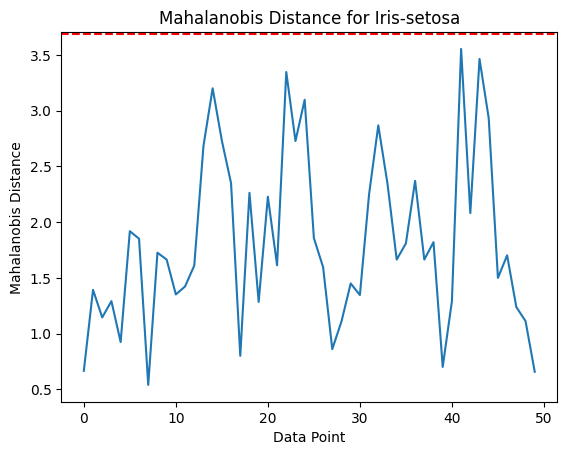

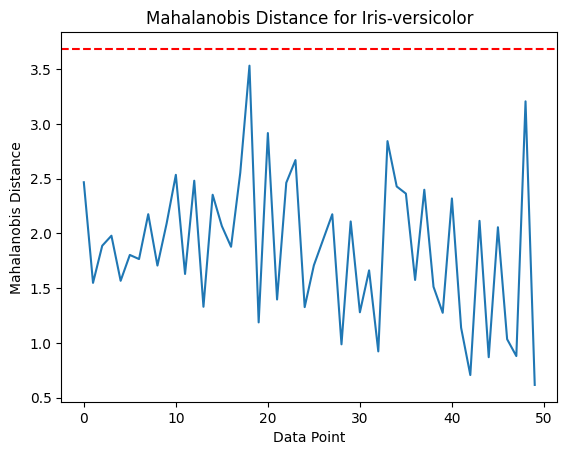

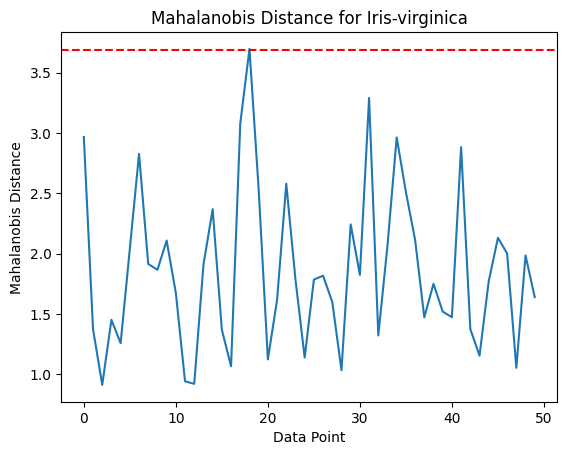

Outliers in Iris-setosa:
 Empty DataFrame
Columns: [Sepal length, Sepal width, Petal length, Petal width]
Index: []
Outliers in Iris-versicolor:
 Empty DataFrame
Columns: [Sepal length, Sepal width, Petal length, Petal width]
Index: []
Outliers in Iris-virginica:
      Sepal length  Sepal width  Petal length  Petal width
118           7.7          2.6           6.9          2.3


In [133]:
from scipy.stats import chi2
#taking aloha as 0.45
threshold = chi2.ppf(0.55, df=4)

#determining outliers using mahalanobis distance
def detect_outliers(data, species):
    mahalanobis_dist_values = []
    for i in range(len(data)):
      data_point = data.iloc[i, :].values
      index = data.iloc[i,:].name
      mahalanobis_dist = np.sqrt((data_point - species_mean_vectors[species]).T @ np.linalg.inv(species_cov_matrices[species]) @ (data_point - species_mean_vectors[species]))
      mahalanobis_dist_values.append([index, mahalanobis_dist])
    mahalanobis_dist_values = np.array(mahalanobis_dist_values)
    outlier_indices = mahalanobis_dist_values[mahalanobis_dist_values[:,1]>threshold][:,0]
    # Plot Mahalanobis Distance values
    plt.plot(mahalanobis_dist_values[:, 1])
    plt.title(f"Mahalanobis Distance for {species}")
    plt.xlabel("Data Point")
    plt.ylabel("Mahalanobis Distance")
    plt.axhline(y=threshold, color = 'red', ls = '--')
    plt.show()
    return data.loc[outlier_indices]

outliers_by_species = {}
for species, data in species_data.items():
    outliers = detect_outliers(data, species)
    outliers_by_species[species] = outliers
#print outliers
for species, outliers in outliers_by_species.items():
  print(f"Outliers in {species}:\n {outliers}")

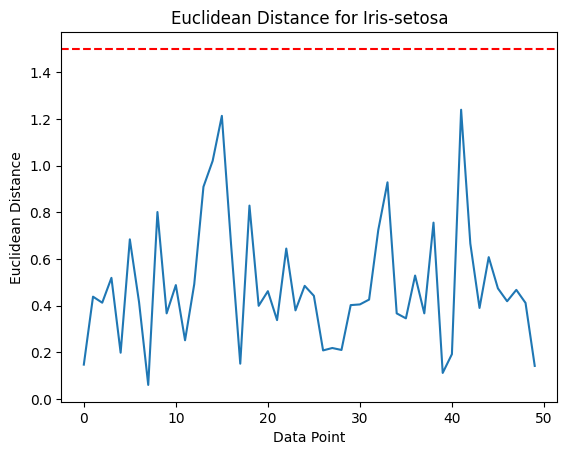

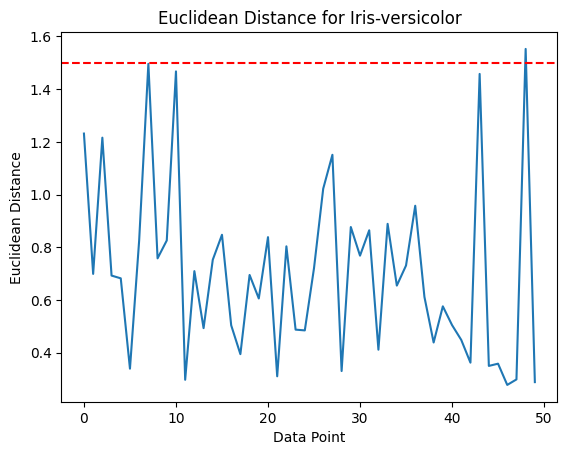

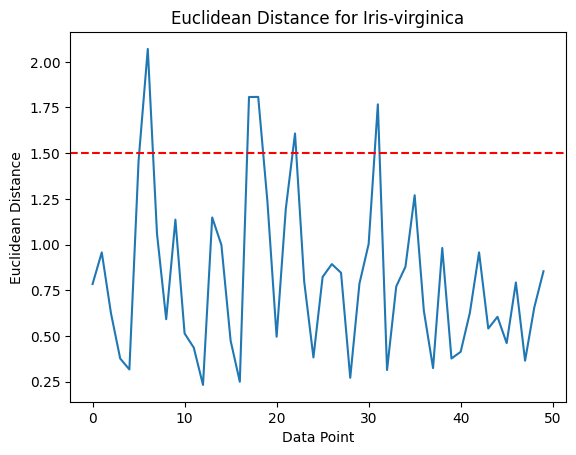

Outliers in Iris-setosa:
     Sepal length  Sepal width  Petal length  Petal width
15           5.7          4.4           1.5          0.4
41           4.5          2.3           1.3          0.3
Outliers in Iris-versicolor:
     Sepal length  Sepal width  Petal length  Petal width
57           4.9          2.4           3.3          1.0
60           5.0          2.0           3.5          1.0
93           5.0          2.3           3.3          1.0
98           5.1          2.5           3.0          1.1
Outliers in Iris-virginica:
      Sepal length  Sepal width  Petal length  Petal width
106           4.9          2.5           4.5          1.7
118           7.7          2.6           6.9          2.3


In [134]:

def detect_outliers(data, species):
    # euclidean_distances = np.linalg.norm(data - species_mean_vectors[species], axis=1)
    # euclidean_dist_values.append([data,euclidean_distances])
    euclidean_dist_values = []
    for i in range(len(data)):
      data_point = data.iloc[i, :].values
      index = data.iloc[i,:].name
      euclidean_dist = np.linalg.norm(data_point - species_mean_vectors[species])
      euclidean_dist_values.append([index, euclidean_dist])
    euclidean_dist_values = np.array(euclidean_dist_values)
    Q1 = np.percentile(euclidean_dist_values[:,1], 25)
    Q3 = np.percentile(euclidean_dist_values[:,1], 75)
    max_threshold = Q3 + 1.5 * (Q3 - Q1)
    min_threshold = Q1 - 1.5 * (Q3 - Q1)
    outlier_indices = euclidean_dist_values[(euclidean_dist_values[:,1] > max_threshold) | (euclidean_dist_values[:,1]< min_threshold)][:,0]

    # Plot Euclidean Distance values
    plt.plot(euclidean_dist_values[:, 1])
    plt.title(f"Euclidean Distance for {species}")
    plt.xlabel("Data Point")
    plt.ylabel("Euclidean Distance")
    plt.axhline(y=1.5, color = 'red', ls = '--')
    plt.show()

    return data.loc[outlier_indices]
outliers_by_species = {}
for species, data in species_data.items():
    outliers = detect_outliers(data, species)
    outliers_by_species[species] = outliers

for species, outliers in outliers_by_species.items(): print(f"Outliers in {species}:\n {outliers}")

In [135]:
# Initialize the contingency table
contingency_table = np.zeros((3, 3), dtype=int)


def mahalanobis_distance(x, y, cov_matrix):
  delta = x - y
  return np.sqrt(delta.T @ np.linalg.inv(cov_matrix) @ delta)

# Iterate over each data point
for index, row in df.iterrows():
    # Extract features of the data point
    features = row[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']]

    # Initialize variables to track the closest mean vector and its species
    min_distance = float('inf')
    predicted_species = None

    # Calculate Mahalanobis Distance to each species' mean vector
    for species, mean_vector in species_mean_vector.iterrows():
        distance = mahalanobis_distance(features.values, mean_vector.values, species_cov_matrices[species])

        # Update closest mean vector and its species if distance is smaller
        if distance < min_distance:
            min_distance = distance
            predicted_species = species

    # Get true species label
    true_species = row['label']

    # Update contingency table
    true_index = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}[true_species]
    pred_index = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}[predicted_species]
    contingency_table[true_index][pred_index] += 1

# Print the contingency table
print("Contingency Table:")
print(contingency_table)


Contingency Table:
[[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]
